In [4]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath("../data/silver"))
from silver_transform import enrich_pass_data

In [5]:
def draw_pitch(ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))

    # Pitch Outline & Centre Line
    plt.plot([0, 0, 120, 120, 0], [0, 80, 80, 0, 0], color="black")
    plt.plot([60, 60], [0, 80], color="black")  # Halfway line

    # Left Penalty Area
    plt.plot([0, 18], [62, 62], color="black")
    plt.plot([18, 18], [62, 18], color="black")
    plt.plot([18, 0], [18, 18], color="black")

    # Right Penalty Area
    plt.plot([120, 102], [62, 62], color="black")
    plt.plot([102, 102], [62, 18], color="black")
    plt.plot([102, 120], [18, 18], color="black")

    # Center Circle
    center_circle = plt.Circle((60, 40), 10, color="black", fill=False)
    ax.add_patch(center_circle)

    ax.set_xlim(0, 120)
    ax.set_ylim(0, 80)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("equal")
    return ax

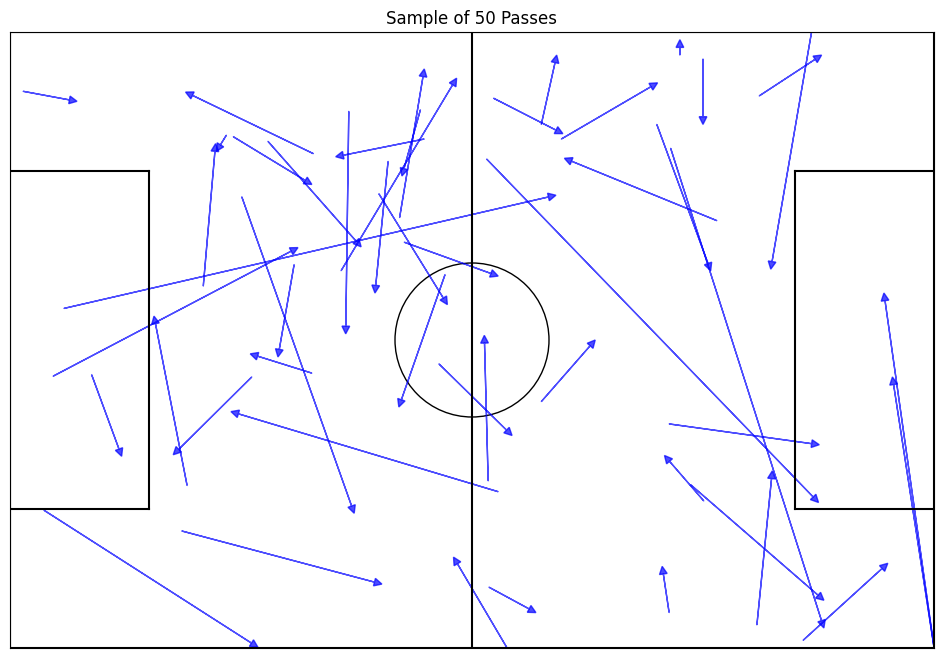

In [6]:
df_passes = df[df["type.name"] == "Pass"].dropna(subset=["x", "y", "end_x", "end_y"])

sample = df_passes.sample(50, random_state=42)

ax = draw_pitch()

for _, row in sample.iterrows():
    ax.arrow(
        row["x"] * 120,
        row["y"] * 80,
        (row["end_x"] - row["x"]) * 120,
        (row["end_y"] - row["y"]) * 80,
        head_width=1,
        head_length=1,
        fc="blue",
        ec="blue",
        alpha=0.7,
        length_includes_head=True
    )

plt.title("Sample of 50 Passes")
plt.show()

In [3]:
df = pd.read_parquet("../data/bronze/events.parquet")
df = enrich_pass_data(df)
df[df["type.name"] == "Pass"][["player.name", "x", "y", "end_x", "end_y", "recipient"]].head(10)



,player.name,x,y,end_x,end_y,recipient
4,José Manuel Jurado Marín,0.500000,0.50000,0.498333,0.51375,Troy Deeney
7,Troy Deeney,0.496667,0.48250,0.224167,0.61,Sebastian Prödl
9,Sebastian Prödl,0.225833,0.61250,0.236667,0.9375,Allan Romeo Nyom
12,Allan Romeo Nyom,0.277500,0.92875,0.8125,0.935,Troy Deeney
15,Allan Romeo Nyom,0.802500,1.00000,0.82,0.8275,José Manuel Jurado Marín
19,José Manuel Jurado Marín,0.635833,0.72250,0.455833,0.52875,Craig Cathcart
22,Craig Cathcart,0.516667,0.50375,0.7975,0.9575,Ikechi Anya
24,Ikechi Anya,0.797500,0.95750,0.69,0.9575,Allan Romeo Nyom
27,Allan Romeo Nyom,0.690000,0.95750,0.996667,0.81,Ikechi Anya
29,Tim Howard,0.058333,0.55125,0.579167,0.855,Romelu Lukaku Menama
